# Quasilinear Theory (QLT) 
#### Bump-on-tail instability 
#### Wave-particle interaction (A.A. Galeev and R.Z. Sagdeev)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy
from scipy.sparse import diags

In [2]:
def Z_fun(z):
    return 1j * np.sqrt(np.pi) * wofz(z)
    
def Z_p_fun(z):
    return -2*(1+z*Z_fun(z))

In [3]:
# bulk electron beam parameters
thermal_bulk = 1
density_bulk = 0.9
drift_bulk = 0

# bump electron beam 1 parameters
thermal_bump1 = 1
density_bump1 = (1-density_bulk)
drift_bump1 = 4

# bump electron beam 2 parameters
thermal_bump2 = 1
density_bump2 =  0
drift_bump2 = -4

# wavenumber of initial perturbation
k_curr = 0.2

In [4]:
# Despersion relation
def disp_k(alpha_1=thermal_bulk, 
           alpha_2=thermal_bump1,
           alpha_3=thermal_bump2, 
           delta_1=density_bulk,
           delta_2=density_bump1, 
           delta_3=density_bump2, 
           u_1=drift_bulk, 
           u_2=drift_bump1, 
           u_3=drift_bump2, 
           k=k_curr):
    return lambda omega : 1 - delta_1*Z_p_fun((omega-k*u_1)/(np.sqrt(2)*alpha_1*k))/(2*(k**2)*(alpha_1**2))\
                            - delta_2*Z_p_fun((omega-k*u_2)/(np.sqrt(2)*alpha_2*k))/(2*(k**2)*(alpha_2**2))\
                            - delta_3*Z_p_fun((omega-k*u_3)/(np.sqrt(2)*alpha_3*k))/(2*(k**2)*(alpha_3**2))

In [5]:
sol = scipy.optimize.newton(disp_k(), drift_bump1*k_curr+0.1j, maxiter=10000)
print(sol)
disp_k()(sol)

(0.6986259883945716+0.06884310136517453j)


(2.864375403532904e-14-1.9684254226604025e-13j)

In [6]:
sol.imag

0.06884310136517453

In [7]:
sol.real/k_curr

3.4931299419728576

In [8]:
def get_D(v, E_init, omega_k, k, t, f_curr, dv):
    gamma_k = get_gamma(omega_k=omega_k, k=k, f_0=f_curr, dv=dv)
    E = get_E(gamma=gamma_k, E_init=E_init, t=t)
    return E * abs(gamma_k) / ((omega_k - k*v)**2 + gamma_k**2)

In [9]:
def get_gamma(omega_k, k, f_0, dv):
    coeff = 0.5 * np.pi * (omega_k)/(k**2)
    index = np.argmin(np.abs(v_grid - omega_k/k))
    print("phase speed = ", v_grid[index])
    print("derivative = ", (f_0[int(index+1)] - f_0[int(index)]) / (dv))
    return coeff * (f_0[int(index+1)] - f_0[int(index)]) / (dv)

In [10]:
def get_E(gamma, E_init, t):
    return E_init * np.exp(2*gamma*t)

In [11]:
def ddx_central(Nx, dx, periodic=True):
    A = diags([-1, 1], [-1, 1], shape=(Nx, Nx)).toarray()
    if periodic:
        A[0, -1] = -1
        A[-1, 0] = 1
    else:
        A[0, 0] = -3
        A[0, 1] = 4
        A[0, 2] = -1
        A[-1, -1] = 3
        A[-1, -2] = -4
        A[-1, -3] = 1
    A /= (2 * dx)
    return A

In [12]:
omega_k_init = sol.real

In [63]:
E_k_init = 0.001

In [64]:
v_grid = np.linspace(-5, 8, int(1e3))
f_0_init = (density_bulk*np.exp(-0.5*((v_grid-drift_bulk)/thermal_bulk)**2)/thermal_bulk 
          + density_bump1*np.exp(-0.5*((v_grid-drift_bump1)/thermal_bump1)**2)/thermal_bump1
          + density_bump2*np.exp(-0.5*((v_grid-drift_bump2)/thermal_bump2)**2)/thermal_bump2)/np.sqrt(2*np.pi)

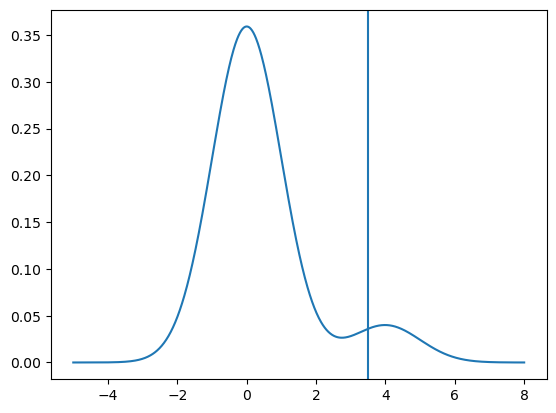

In [65]:
plt.plot(v_grid, f_0_init)
plt.axvline(sol.real/k_curr)

In [66]:
D_derivative = ddx_central(Nx=len(v_grid), dx=np.abs(v_grid[1]-v_grid[0]), periodic=False)

In [67]:
def dydt(t, f):
    gamma_k = get_gamma(omega_k=omega_k_init, k=k_curr, f_0=f, dv=abs(v_grid[1]-v_grid[0]))
    print("gamma = ", gamma_k)
    D_diffusion = get_D(v=v_grid, E_init=E_k_init, omega_k=omega_k_init, k=k_curr, t=t, f_curr=f, dv=np.abs(v_grid[1]-v_grid[0]))
    rhs= D_derivative @ (D_diffusion * (D_derivative @ f))
    # enforce_boundary 
    rhs[-1] = 0
    rhs[0] = 0
    return rhs

In [70]:
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, 2000], y0=f_0_init)

phase speed =  3.4974974974974966
derivative =  0.014782861286078884
gamma =  0.4055674802118596
phase speed =  3.4974974974974966
derivative =  0.014782861286078884
phase speed =  3.4974974974974966
derivative =  0.013946932585296189
gamma =  0.38263379435413775
phase speed =  3.4974974974974966
derivative =  0.013946932585296189
phase speed =  3.4974974974974966
derivative =  0.014773166988333175
gamma =  0.40530151736251235
phase speed =  3.4974974974974966
derivative =  0.014773166988333175
phase speed =  3.4974974974974966
derivative =  0.014767876156426685
gamma =  0.40515636350339035
phase speed =  3.4974974974974966
derivative =  0.014767876156426685
phase speed =  3.4974974974974966
derivative =  0.014740824855685637
gamma =  0.4044142116516151
phase speed =  3.4974974974974966
derivative =  0.014740824855685637
phase speed =  3.4974974974974966
derivative =  0.014735731890043647
gamma =  0.40427448624918755
phase speed =  3.4974974974974966
derivative =  0.014735731890043647


/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_16742/1644703827.py:2: RuntimeWarning: overflow encountered in exp
  return E_init * np.exp(2*gamma*t)
/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_16742/2573478876.py:5: RuntimeWarning: invalid value encountered in matmul
  rhs= D_derivative @ (D_diffusion * (D_derivative @ f))
/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_16742/415017536.py:4: RuntimeWarning: overflow encountered in scalar power
  return E * abs(gamma_k) / ((omega_k - k*v)**2 + gamma_k**2)
/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_16742/415017536.py:4: RuntimeWarning: invalid value encountered in divide
  return E * abs(gamma_k) / ((omega_k - k*v)**2 + gamma_k**2)


phase speed =  3.4974974974974966
derivative =  0.11950480696899352
gamma =  3.2786117990068218
phase speed =  3.4974974974974966
derivative =  0.11950480696899352
phase speed =  3.4974974974974966
derivative =  -160426.64627626797
gamma =  -4401301.576872425
phase speed =  3.4974974974974966
derivative =  -160426.64627626797
phase speed =  3.4974974974974966
derivative =  0.01280333395326661
gamma =  0.3512591905754542
phase speed =  3.4974974974974966
derivative =  0.01280333395326661
phase speed =  3.4974974974974966
derivative =  0.012804848016222009
gamma =  0.35130072885994595
phase speed =  3.4974974974974966
derivative =  0.012804848016222009
phase speed =  3.4974974974974966
derivative =  0.01287595990392398
gamma =  0.353251681963697
phase speed =  3.4974974974974966
derivative =  0.01287595990392398
phase speed =  3.4974974974974966
derivative =  0.012998679350839875
gamma =  0.3566184873402409
phase speed =  3.4974974974974966
derivative =  0.012998679350839875
phase speed 

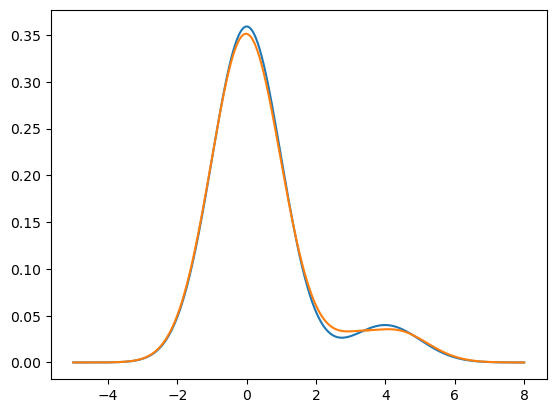

In [71]:
_ = plt.plot(v_grid, result.y[:, 0])
_ = plt.plot(v_grid, result.y[:, -1])